In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dataset shape: (169845, 2)
Label counts:
 emotion
love        29132
neutral     25021
surprise    25000
fear        24938
joy         24901
sadness     20853
anger       20000
Name: count, dtype: int64
✅ Folder ready at: /content/drive/MyDrive/Sentiment analyser
Splits -> train: 135876 val: 16984 test: 16985
Classes: ['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise']
Num classes: 7


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8

Epoch 1: val_loss improved from inf to 0.81108, saving model to ./bilstm_results/bilstm_best.h5


2124/2124 - 39s - 18ms/step - accuracy: 0.6220 - loss: 1.0546 - val_accuracy: 0.7175 - val_loss: 0.8111 - learning_rate: 1.0000e-03
Epoch 2/8

Epoch 2: val_loss improved from 0.81108 to 0.72260, saving model to ./bilstm_results/bilstm_best.h5


2124/2124 - 36s - 17ms/step - accuracy: 0.7631 - loss: 0.6865 - val_accuracy: 0.7495 - val_loss: 0.7226 - learning_rate: 1.0000e-03
Epoch 3/8

Epoch 3: val_loss improved from 0.72260 to 0.70996, saving model to ./bilstm_results/bilstm_best.h5


2124/2124 - 35s - 17ms/step - accuracy: 0.8006 - loss: 0.5703 - val_accuracy: 0.7587 - val_loss: 0.7100 - learning_rate: 1.0000e-03
Epoch 4/8

Epoch 4: val_loss did not improve from 0.70996
2124/2124 - 35s - 16ms/step - accuracy: 0.8258 - loss: 0.4971 - val_accuracy: 0.7708 - val_loss: 0.7134 - learning_rate: 1.0000e-03
Epoch 5/8

Epoch 5: val_loss did not improve from 0.70996

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2124/2124 - 35s - 17ms/step - accuracy: 0.8476 - loss: 0.4320 - val_accuracy: 0.7764 - val_loss: 0.7302 - learning_rate: 1.0000e-03
Epoch 6/8

Epoch 6: val_loss did not improve from 0.70996
2124/2124 - 35s - 17ms/step - accuracy: 0.8786 - loss: 0.3441 - val_accuracy: 0.7854 - val_loss: 0.7778 - learning_rate: 5.0000e-04
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


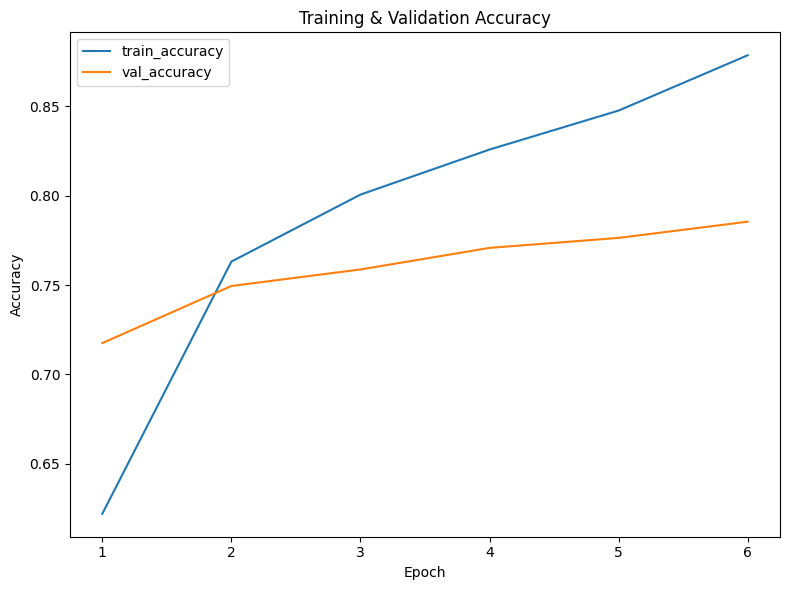

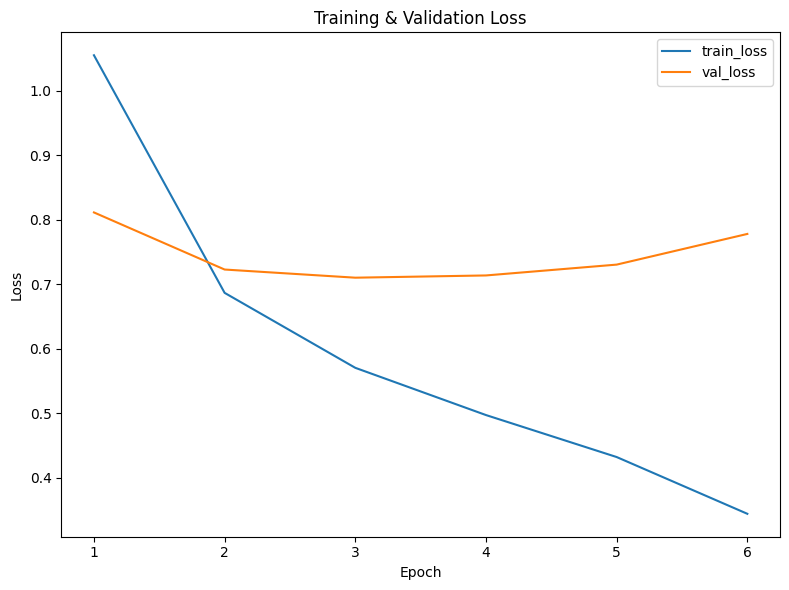


Classification Report (Test Set):

              precision    recall  f1-score   support

       anger     0.7581    0.6910    0.7230      2000
        fear     0.8030    0.8697    0.8350      2494
         joy     0.7191    0.7309    0.7250      2490
        love     0.6478    0.7868    0.7106      2913
     neutral     0.8973    0.7334    0.8071      2502
     sadness     0.7896    0.7627    0.7759      2086
    surprise     0.8062    0.7520    0.7781      2500

    accuracy                         0.7636     16985
   macro avg     0.7744    0.7609    0.7650     16985
weighted avg     0.7715    0.7636    0.7646     16985


📘 Test Metrics
Accuracy:  0.7636
Precision: 0.7744
Recall:    0.7609
F1 Score:  0.7650

Detailed Test Classification Report:

              precision    recall  f1-score   support

       anger     0.7581    0.6910    0.7230      2000
        fear     0.8030    0.8697    0.8350      2494
         joy     0.7191    0.7309    0.7250      2490
        love     0.6478

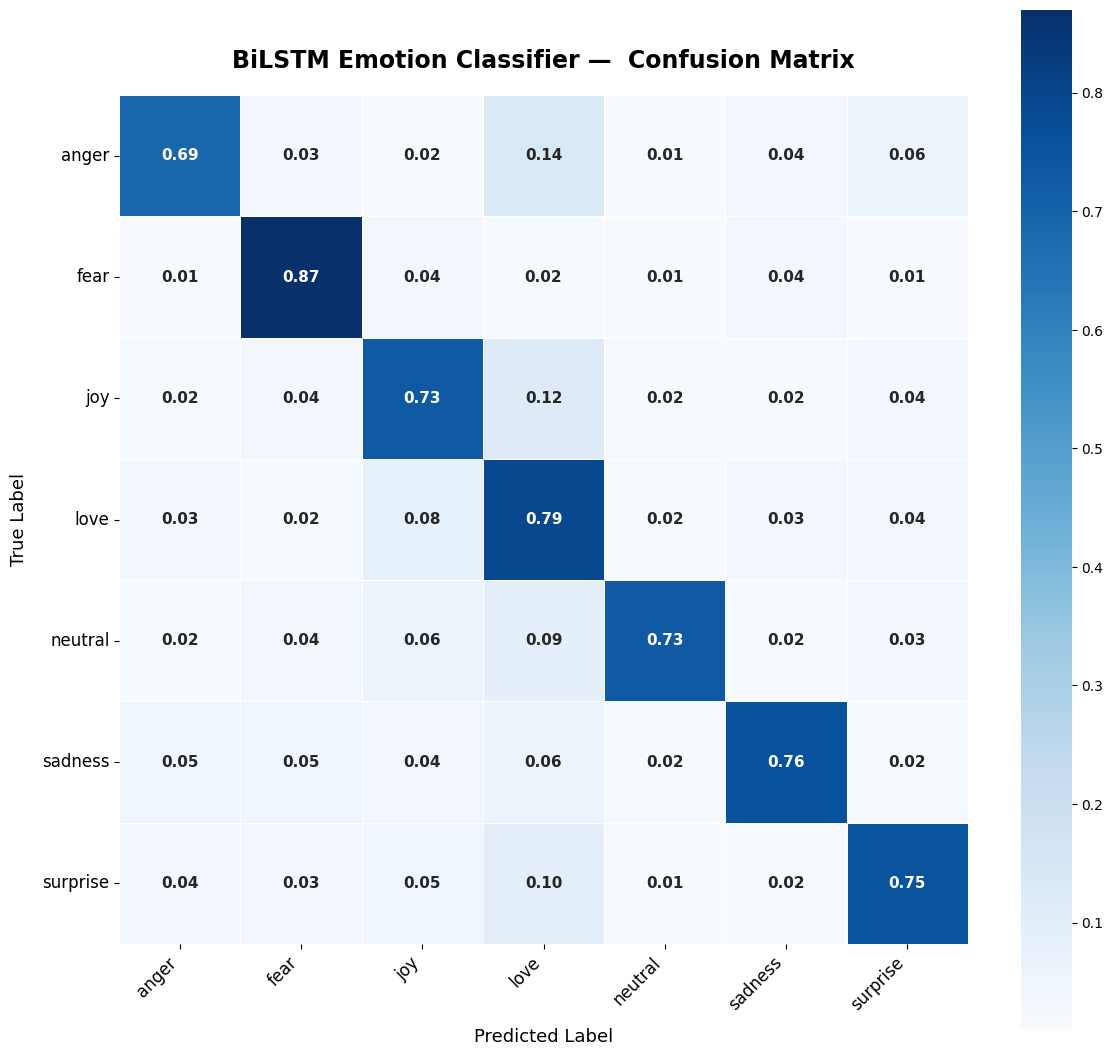


Saved artifacts to: ./bilstm_results
 - accuracy_plot.png
 - bilstm_best.h5
 - bilstm_final.h5
 - confusion_matrix.png
 - label_encoder.pkl
 - loss_plot.png
 - test_predictions.csv
 - tokenizer.pkl
 - training_history.pkl


In [ ]:
# ================================================================
# 🧠 BiLSTM Emotion Classifier — Train / Eval / Save (Keras)
# ================================================================
# Instructions:
# - In Colab: run `!pip install -q tensorflow` before running this cell
# - To save to Google Drive in Colab: mount drive and set DRIVE_OUT_DIR below
# ================================================================

import os
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# ----------------- USER CONFIG -----------------
DATA_PATH = ("/mnt/data/balanced_emotion_dataset.csv")   # change if needed
# If using Colab and want to save to Drive, set DRIVE_OUT_DIR to something like "/content/drive/MyDrive/bilstm_results"
DRIVE_OUT_DIR = None  # <-- set to a Drive path if you mounted Drive
OUT_DIR = DRIVE_OUT_DIR if DRIVE_OUT_DIR is not None else "./bilstm_results"
os.makedirs(OUT_DIR, exist_ok=True)

MAX_NUM_WORDS = 20000
MAX_SEQ_LEN = 120
EMBEDDING_DIM = 128
EPOCHS = 8
BATCH_SIZE = 64
# ------------------------------------------------

# --------------- STEP 1 — Load and prepare -----------------
df = pd.read_csv("/content/balanced_emotion_dataset.csv")
# Expecting columns: (emotion, text) - adjust if necessary
if list(df.columns[:2]) != ['emotion','text']:
    # try to rename permissively
    df = df.rename(columns={df.columns[0]:'emotion', df.columns[1]:'text'})
df = df.dropna().reset_index(drop=True)
print("Dataset shape:", df.shape)
print("Label counts:\n", df['emotion'].value_counts())

# Define your target directory in Google Drive
DRIVE_SAVE_PATH = "/content/drive/MyDrive/Sentiment analyser"

# Create the directory if it doesn’t exist
os.makedirs(DRIVE_SAVE_PATH, exist_ok=True)

print("✅ Folder ready at:", DRIVE_SAVE_PATH)


# --------------- STEP 2 — Train/Val/Test split (80/10/10) -----------------
train_df, temp_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df['emotion'])
val_df, test_df   = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df['emotion'])
print("Splits -> train:", len(train_df), "val:", len(val_df), "test:", len(test_df))

# --------------- STEP 3 — Tokenization & padding -----------------
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'].tolist())

def texts_to_padded_sequences(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

X_train = texts_to_padded_sequences(train_df['text'].tolist())
X_val   = texts_to_padded_sequences(val_df['text'].tolist())
X_test  = texts_to_padded_sequences(test_df['text'].tolist())

le = LabelEncoder()
y_train = le.fit_transform(train_df['emotion'])
y_val   = le.transform(val_df['emotion'])
y_test  = le.transform(test_df['emotion'])

num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat   = to_categorical(y_val, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

print("Classes:", list(le.classes_))
print("Num classes:", num_classes)

# --------------- STEP 4 — Build BiLSTM model -----------------
def build_model(vocab_size=MAX_NUM_WORDS, embed_dim=EMBEDDING_DIM, seq_len=MAX_SEQ_LEN, num_classes=num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=seq_len))
    model.add(Bidirectional(LSTM(128, return_sequences=False)))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

# --------------- STEP 5 — Callbacks & Training -----------------
checkpoint_path = os.path.join(OUT_DIR, "bilstm_best.h5")
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=2
)

# --------------- STEP 6 — Save artifacts -----------------
final_model_path = os.path.join(OUT_DIR, "bilstm_final.h5")
model.save(final_model_path)

with open(os.path.join(OUT_DIR, "tokenizer.pkl"), "wb") as f:
    pickle.dump(tokenizer, f)
with open(os.path.join(OUT_DIR, "label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)
with open(os.path.join(OUT_DIR, "training_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

# --------------- STEP 7 — Plots: training/validation accuracy & loss -----------------
hist = history.history
epochs_range = range(1, len(hist['loss'])+1)

plt.figure(figsize=(8,6))
plt.plot(epochs_range, hist['accuracy'], label='train_accuracy')
plt.plot(epochs_range, hist['val_accuracy'], label='val_accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
acc_plot_path = os.path.join(OUT_DIR, "accuracy_plot.png")
plt.savefig(acc_plot_path)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(epochs_range, hist['loss'], label='train_loss')
plt.plot(epochs_range, hist['val_loss'], label='val_loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
loss_plot_path = os.path.join(OUT_DIR, "loss_plot.png")
plt.savefig(loss_plot_path)
plt.show()

# --------------- STEP 8 — Evaluation on Test Set -----------------
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ================================================================
# 📘 MindScape — Test Evaluation Metrics
# ================================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n📘 Test Metrics")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nDetailed Test Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))


# Elegant confusion matrix (user provided style)
def plot_confusion_matrix_final(y_true, y_pred, labels, model_name, out_path=None):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    cm_display = np.round(cm, 2)

    plt.figure(figsize=(12, 11))
    sns.heatmap(
        cm_display,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        cbar=True,
        xticklabels=labels,
        yticklabels=labels,
        linewidths=0.5,
        linecolor='white',
        square=True,
        annot_kws={"size": 11, "weight": "bold"}
    )

    plt.title(f"{model_name} —  Confusion Matrix", fontsize=17, fontweight='bold', pad=20)
    plt.xlabel("Predicted Label", fontsize=13, labelpad=10)
    plt.ylabel("True Label", fontsize=13, labelpad=10)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    if out_path:
        plt.savefig(out_path, bbox_inches='tight')
    plt.show()

cm_path = os.path.join(OUT_DIR, "confusion_matrix.png")
plot_confusion_matrix_final(y_test, y_pred, le.classes_, model_name="BiLSTM Emotion Classifier", out_path=cm_path)

# --------------- STEP 9 — Save predictions and a small results CSV -----------------
results_df = test_df.copy().reset_index(drop=True)
results_df['true_label'] = le.inverse_transform(y_test)
results_df['pred_label'] = le.inverse_transform(y_pred)
results_df.to_csv(os.path.join(OUT_DIR, "test_predictions.csv"), index=False)

# --------------- Report artifact locations -----------------
print("\nSaved artifacts to:", OUT_DIR)
for fname in sorted(os.listdir(OUT_DIR)):
    print(" -", fname)


In [ ]:
import os

drive_path = "/content/drive/MyDrive/Sentiment analyser"
os.makedirs(drive_path, exist_ok=True)

print("✅ Drive folder ready at:", drive_path)


In [ ]:
import shutil

source_folder = "./bilstm_results"
target_folder = "/content/drive/MyDrive/Sentiment analyser"

# Copy everything to Drive
shutil.copytree(source_folder, target_folder, dirs_exist_ok=True)

print(f"✅ All model files copied to: {target_folder}")


In [ ]:
# ================================================================
# 🧠 MindScape Emotion Classification — BiLSTM Prediction Utility (Final Fixed)
# ================================================================

import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ------------------------ STEP 1: Load Artifacts ------------------------
SAVE_DIR = "/content/drive/MyDrive/Sentiment analyser"

MODEL_PATH = os.path.join(SAVE_DIR, "bilstm_best.h5")  # or bilstm_final.h5
TOKENIZER_PATH = os.path.join(SAVE_DIR, "tokenizer.pkl")
ENCODER_PATH = os.path.join(SAVE_DIR, "label_encoder.pkl")

print("🔄 Loading model and artifacts...\n")

# Load model
model = load_model(MODEL_PATH)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load tokenizer and label encoder
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)
with open(ENCODER_PATH, "rb") as f:
    le = pickle.load(f)

print(f"✅ Loaded BiLSTM model from: {MODEL_PATH}")
print(f"✅ Tokenizer vocab size: {len(tokenizer.word_index)}")
print(f"✅ Classes: {list(le.classes_)}\n")

# ------------------------ STEP 2: Config & Helper Functions ------------------------
MAX_SEQ_LEN = 120  # Must match training script exactly

def clean_text(text):
    """Mimics the training preprocessing exactly."""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def preprocess_texts(texts):
    if isinstance(texts, str):
        texts = [texts]
    cleaned = [clean_text(t) for t in texts]
    seqs = tokenizer.texts_to_sequences(cleaned)
    padded = pad_sequences(seqs, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
    return padded, cleaned

def show_confidence_bar(probs, classes):
    """Visual confidence plot."""
    plt.figure(figsize=(6,3))
    plt.bar(classes, probs)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Probability")
    plt.tight_layout()
    plt.show()

# ------------------------ STEP 3: Diagnostic Token Check ------------------------
print("🔍 Diagnostic check:")
sample = ["i am very happy today"]
seq = tokenizer.texts_to_sequences(sample)
print("  Cleaned example:", clean_text(sample[0]))
print("  Tokenized example:", seq)
print("  Sequence length:", len(seq[0]))
print("  MAX_SEQ_LEN used:", MAX_SEQ_LEN, "\n")

# ------------------------ STEP 4: Prediction Function ------------------------
def predict_emotion(texts, show_probs=True, visualize=False):
    """Predict emotions for given text(s) using BiLSTM."""
    padded, cleaned = preprocess_texts(texts)
    preds = model.predict(padded, verbose=0)
    pred_labels = np.argmax(preds, axis=1)
    emotions = le.inverse_transform(pred_labels)

    print("🧾 Predictions:\n")
    for i, (orig, clean, emotion) in enumerate(zip(texts, cleaned, emotions)):
        print(f"🗣 Original Text: {orig}")
        print(f"💬 Cleaned Text : {clean}")
        print(f"🎯 Predicted Emotion: {emotion}")

        if show_probs:
            top_indices = np.argsort(preds[i])[::-1][:3]
            print("\n🔎 Top Probabilities:")
            for idx in top_indices:
                print(f"   {le.classes_[idx]}: {preds[i][idx]:.4f}")
        if visualize:
            show_confidence_bar(preds[i], le.classes_)
        print("-" * 65 + "\n")

# ------------------------ STEP 5: Example Predictions ------------------------
sample_texts = [
    "I can’t stop smiling, this made my day!",
    "I feel nervous about tomorrow’s results.",
    "I didn’t expect that to happen at all!",
    "I miss the old days, everything feels heavy lately.",
    "Nothing special today, just working quietly."
]

predict_emotion(sample_texts, show_probs=True, visualize=True)


✅ Dataset Loaded: (169845, 2)
emotion
love        29132
neutral     25021
surprise    25000
fear        24938
joy         24901
sadness     20853
anger       20000
Name: count, dtype: int64
Train: 135876, Val: 16984, Test: 16985
✅ Tokenization & Label Encoding Done — Classes: ['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 120, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 120, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_1 (Attention)         │ (None, 256)            │           376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,840,447 (10.84 MB)

 Trainable params: 2,840,447 (10.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8

Epoch 1: val_loss improved from inf to 0.82076, saving model to /content/drive/MyDrive/Sentiment analyser/bilstm_attention_best.h5


2124/2124 - 42s - 20ms/step - accuracy: 0.5827 - loss: 1.1481 - val_accuracy: 0.7121 - val_loss: 0.8208 - learning_rate: 1.0000e-03
Epoch 2/8

Epoch 2: val_loss improved from 0.82076 to 0.71124, saving model to /content/drive/MyDrive/Sentiment analyser/bilstm_attention_best.h5


2124/2124 - 40s - 19ms/step - accuracy: 0.7602 - loss: 0.6994 - val_accuracy: 0.7527 - val_loss: 0.7112 - learning_rate: 1.0000e-03
Epoch 3/8

Epoch 3: val_loss improved from 0.71124 to 0.68405, saving model to /content/drive/MyDrive/Sentiment analyser/bilstm_attention_best.h5


2124/2124 - 40s - 19ms/step - accuracy: 0.8064 - loss: 0.5615 - val_accuracy: 0.7660 - val_loss: 0.6841 - learning_rate: 1.0000e-03
Epoch 4/8

Epoch 4: val_loss did not improve from 0.68405
2124/2124 - 38s - 18ms/step - accuracy: 0.8355 - loss: 0.4751 - val_accuracy: 0.7720 - val_loss: 0.6942 - learning_rate: 1.0000e-03
Epoch 5/8

Epoch 5: val_loss did not improve from 0.68405

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2124/2124 - 39s - 18ms/step - accuracy: 0.8587 - loss: 0.4086 - val_accuracy: 0.7787 - val_loss: 0.7456 - learning_rate: 1.0000e-03
Epoch 6/8

Epoch 6: val_loss did not improve from 0.68405
2124/2124 - 39s - 18ms/step - accuracy: 0.8868 - loss: 0.3245 - val_accuracy: 0.7874 - val_loss: 0.7972 - learning_rate: 5.0000e-04
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

📘 Test Classification Report:

              precision    recall  f1-score   support

       ang

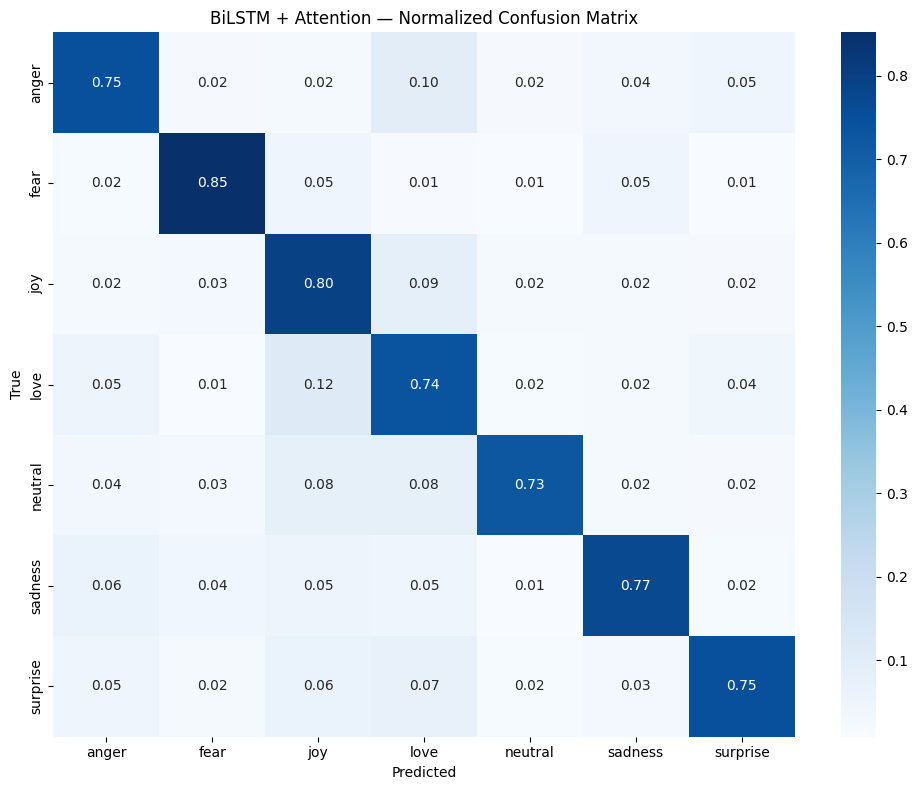

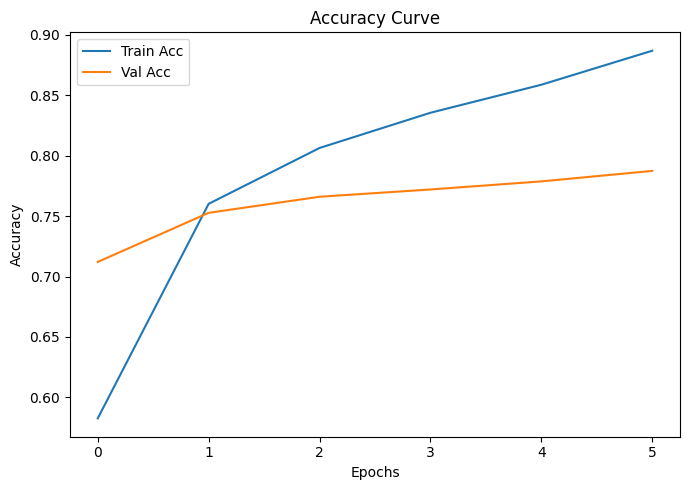

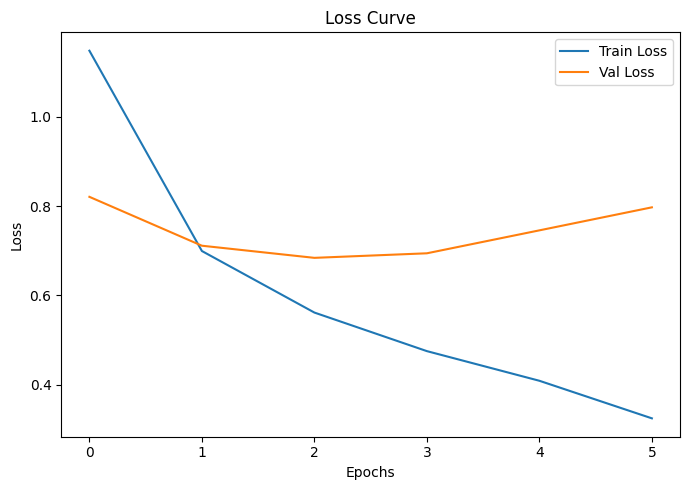


✅ Model and artifacts saved successfully to: /content/drive/MyDrive/Sentiment analyser


In [ ]:
# ================================================================
# 🧠 MindScape Emotion Classification — BiLSTM + Attention Model
# ================================================================

# --------------------------- STEP 1: Drive Setup ---------------------------


import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, Bidirectional, LSTM,
    Dense, Dropout, Layer, GlobalAveragePooling1D, Activation, Permute, Multiply
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# --------------------------- STEP 2: Load Dataset ---------------------------
DATA_PATH = "/content/balanced_emotion_dataset.csv"   # upload or change path accordingly
SAVE_DIR = "/content/drive/MyDrive/Sentiment analyser"
os.makedirs(SAVE_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
df = df.rename(columns={df.columns[0]:'emotion', df.columns[1]:'text'})
df = df.dropna().reset_index(drop=True)

print("✅ Dataset Loaded:", df.shape)
print(df['emotion'].value_counts())

# --------------------------- STEP 3: Split Dataset ---------------------------
train_df, temp_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df['emotion'])
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df['emotion'])

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# --------------------------- STEP 4: Tokenization ---------------------------
MAX_NUM_WORDS = 20000
MAX_SEQ_LEN = 120
EMBEDDING_DIM = 128

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

def texts_to_padded(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

X_train = texts_to_padded(train_df['text'])
X_val   = texts_to_padded(val_df['text'])
X_test  = texts_to_padded(test_df['text'])

# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(train_df['emotion'])
y_val   = le.transform(val_df['emotion'])
y_test  = le.transform(test_df['emotion'])

num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat   = to_categorical(y_val, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("✅ Tokenization & Label Encoding Done — Classes:", list(le.classes_))

# --------------------------- STEP 5: Define Attention Layer ---------------------------
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='normal')
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros')
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# --------------------------- STEP 6: Build Model ---------------------------
def build_bilstm_attention():
    inputs = Input(shape=(MAX_SEQ_LEN,))
    x = Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQ_LEN)(inputs)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.4)(x)
    x = Attention()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
    return model

model = build_bilstm_attention()
model.summary()

# --------------------------- STEP 7: Train Model ---------------------------
checkpoint_path = os.path.join(SAVE_DIR, "bilstm_attention_best.h5")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

EPOCHS = 8
BATCH_SIZE = 64

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=2
)

# --------------------------- STEP 8: Evaluate Model ---------------------------
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

print("\n📘 Test Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("BiLSTM + Attention — Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "bilstm_attention_confusion_matrix.png"))
plt.show()

# --------------------------- STEP 9: Plot Training Curves ---------------------------
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "bilstm_attention_accuracy.png"))
plt.show()

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "bilstm_attention_loss.png"))
plt.show()

# --------------------------- STEP 10: Save Artifacts ---------------------------
final_model_path = os.path.join(SAVE_DIR, "bilstm_attention_final.h5")
model.save(final_model_path)

with open(os.path.join(SAVE_DIR, "tokenizer.pkl"), "wb") as f:
    pickle.dump(tokenizer, f)

with open(os.path.join(SAVE_DIR, "label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)

print(f"\n✅ Model and artifacts saved successfully to: {SAVE_DIR}")


Mounted at /content/drive
✅ Dataset loaded: (169845, 2)
emotion
love        29132
neutral     25021
surprise    25000
fear        24938
joy         24901
sadness     20853
anger       20000
Name: count, dtype: int64
Classes: ['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise']


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 120, 128)  │  2,560,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 118, 128)  │     49,280 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 117, 128)  │     65,664 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 116, 128)  │     82,048 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 384)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     49,280 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 7)         │        903 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,807,175 (10.71 MB)

 Trainable params: 2,807,175 (10.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8

Epoch 1: val_loss improved from inf to 0.73296, saving model to /content/drive/MyDrive/sentiment analyser/textcnn_best.keras
2124/2124 - 30s - 14ms/step - accuracy: 0.6616 - loss: 0.9602 - val_accuracy: 0.7456 - val_loss: 0.7330 - learning_rate: 1.0000e-03
Epoch 2/8

Epoch 2: val_loss improved from 0.73296 to 0.66982, saving model to /content/drive/MyDrive/sentiment analyser/textcnn_best.keras
2124/2124 - 27s - 13ms/step - accuracy: 0.7933 - loss: 0.5946 - val_accuracy: 0.7701 - val_loss: 0.6698 - learning_rate: 1.0000e-03
Epoch 3/8

Epoch 3: val_loss improved from 0.66982 to 0.66969, saving model to /content/drive/MyDrive/sentiment analyser/textcnn_best.keras
2124/2124 - 14s - 7ms/step - accuracy: 0.8427 - loss: 0.4484 - val_accuracy: 0.7859 - val_loss: 0.6697 - learning_rate: 1.0000e-03
Epoch 4/8

Epoch 4: val_loss did not improve from 0.66969
2124/2124 - 14s - 7ms/step - accuracy: 0.8737 - loss: 0.3570 - val_accuracy: 0.7896 - val_loss: 0.7042 - learning_rate: 1.0000e-03


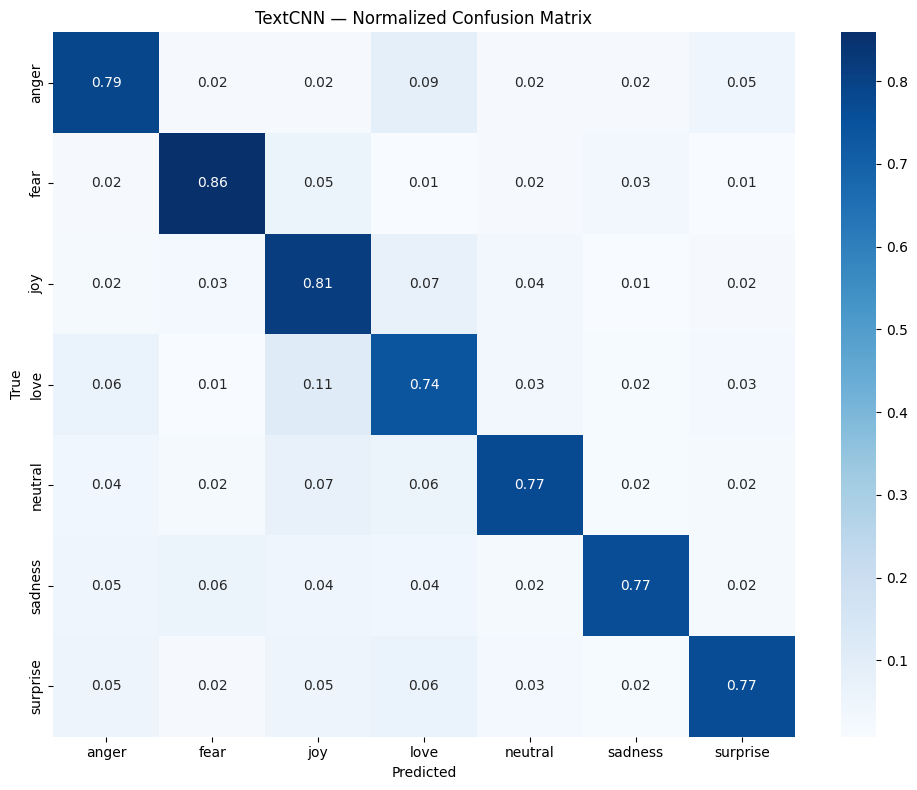

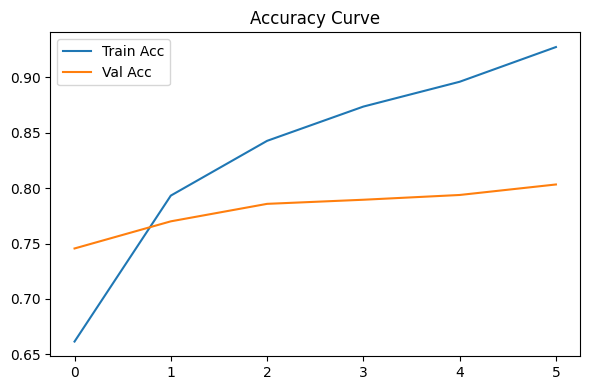

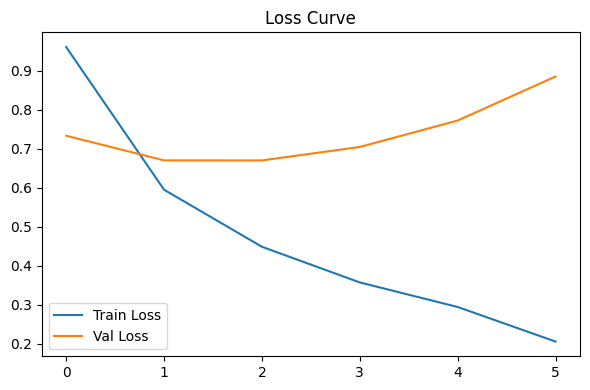


✅ All artifacts saved to: /content/drive/MyDrive/sentiment analyser
 - textcnn_accuracy.png
 - textcnn_best.keras
 - textcnn_confusion_matrix.png
 - textcnn_final.keras
 - textcnn_history.pkl
 - textcnn_label_encoder.pkl
 - textcnn_loss.png
 - textcnn_predictions.csv
 - textcnn_tokenizer.pkl


In [ ]:
# ================================================================
# 🧠 MindScape — TextCNN Emotion Classifier (Full Pipeline)
# ================================================================

# ---------- STEP 1: Mount Drive ----------
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ---------- STEP 2: Imports ----------
import os, pickle, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# ---------- STEP 3: Paths & Config ----------
SAVE_DIR = "/content/drive/MyDrive/sentiment analyser"
os.makedirs(SAVE_DIR, exist_ok=True)

DATA_PATH = "/content/balanced_emotion_dataset.csv"  # change if needed

MAX_NUM_WORDS = 20000
MAX_SEQ_LEN   = 120
EMBEDDING_DIM = 128
BATCH_SIZE    = 64
EPOCHS        = 8
SEED          = 42

# ---------- STEP 4: Load Dataset ----------
df = pd.read_csv("/content/balanced_emotion_dataset.csv")
df = df.rename(columns={df.columns[0]:"emotion", df.columns[1]:"text"}).dropna().reset_index(drop=True)
print("✅ Dataset loaded:", df.shape)
print(df["emotion"].value_counts())

# ---------- STEP 5: Split ----------
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df["emotion"], random_state=SEED)
val_df, test_df   = train_test_split(temp_df, test_size=0.5, stratify=temp_df["emotion"], random_state=SEED)

# ---------- STEP 6: Tokenize ----------
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["text"])
def to_pad(x): return pad_sequences(tokenizer.texts_to_sequences(x), maxlen=MAX_SEQ_LEN, padding="post", truncating="post")
X_train, X_val, X_test = map(to_pad, [train_df["text"], val_df["text"], test_df["text"]])

# ---------- STEP 7: Encode labels ----------
le = LabelEncoder()
y_train, y_val, y_test = [le.fit_transform(train_df["emotion"]),
                          le.transform(val_df["emotion"]),
                          le.transform(test_df["emotion"])]
y_train, y_val, y_test = map(lambda y: to_categorical(y, num_classes=len(le.classes_)),
                             [y_train, y_val, y_test])
print("Classes:", list(le.classes_))

# ---------- STEP 8: Build TextCNN ----------
def build_textcnn():
    inputs = Input(shape=(MAX_SEQ_LEN,))
    x = Embedding(MAX_NUM_WORDS, EMBEDDING_DIM)(inputs)

    # 3 parallel convolutional filters (3, 4, 5)
    convs = []
    for kernel_size in [3, 4, 5]:
        c = Conv1D(filters=128, kernel_size=kernel_size, activation='relu')(x)
        c = GlobalMaxPooling1D()(c)
        convs.append(c)

    x = Concatenate()(convs)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(len(le.classes_), activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = build_textcnn()
model.summary()

# ---------- STEP 9: Training ----------
best_ckpt  = os.path.join(SAVE_DIR, "textcnn_best.keras")
final_path = os.path.join(SAVE_DIR, "textcnn_final.keras")

callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(best_ckpt, monitor="val_loss", save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)
]

hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=callbacks, verbose=2
)
model.save(final_path)

# ---------- STEP 10: Evaluation ----------
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro")
rec  = recall_score(y_true, y_pred, average="macro")
f1   = f1_score(y_true, y_pred, average="macro")

print("\n📘 Test Metrics")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}\n")
print("Detailed Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# ---------- STEP 11: Confusion Matrix ----------
cm = confusion_matrix(y_true, y_pred, normalize="true")
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("TextCNN — Normalized Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout()
cm_path = os.path.join(SAVE_DIR, "textcnn_confusion_matrix.png")
plt.savefig(cm_path)
plt.show()

# ---------- STEP 12: Accuracy/Loss Curves ----------
plt.figure(figsize=(6,4))
plt.plot(hist.history["accuracy"], label="Train Acc")
plt.plot(hist.history["val_accuracy"], label="Val Acc")
plt.legend(); plt.title("Accuracy Curve"); plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "textcnn_accuracy.png"))
plt.show()

plt.figure(figsize=(6,4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss Curve"); plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "textcnn_loss.png"))
plt.show()

# ---------- STEP 13: Save Artifacts ----------
with open(os.path.join(SAVE_DIR,"textcnn_tokenizer.pkl"),"wb") as f: pickle.dump(tokenizer,f)
with open(os.path.join(SAVE_DIR,"textcnn_label_encoder.pkl"),"wb") as f: pickle.dump(le,f)
with open(os.path.join(SAVE_DIR,"textcnn_history.pkl"),"wb") as f: pickle.dump(hist.history,f)

pred_df = test_df.copy().reset_index(drop=True)
pred_df["true_label"] = le.inverse_transform(y_true)
pred_df["pred_label"] = le.inverse_transform(y_pred)
pred_df.to_csv(os.path.join(SAVE_DIR,"textcnn_predictions.csv"), index=False)

# ---------- STEP 14: Summary ----------
print("\n✅ All artifacts saved to:", SAVE_DIR)
for f in sorted(os.listdir(SAVE_DIR)):
    if "textcnn" in f:
        print(" -", f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Keys inside the history file:
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

📊 Training Metrics Summary:


,accuracy,loss,val_accuracy,val_loss,learning_rate
1,0.795652,0.594137,0.773257,0.659954,0.0010
2,0.844292,0.446522,0.787329,0.655043,0.0010
3,0.875688,0.355781,0.790155,0.687887,0.0010
4,0.897421,0.292048,0.787918,0.741317,0.0010
5,0.928464,0.202318,0.799105,0.893421,0.0005


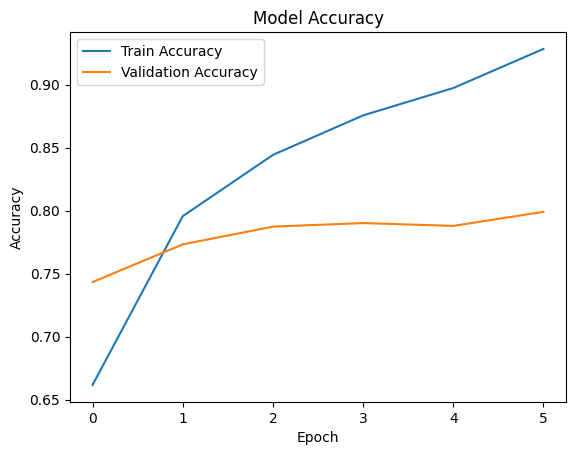

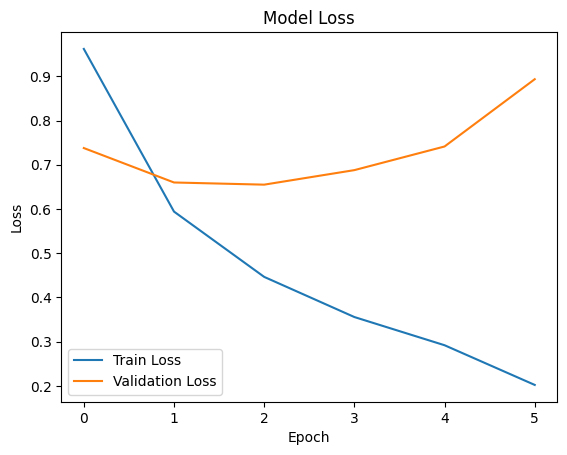

In [ ]:
# ============================================================
# 🧠 Load and Inspect TextCNN Training History from Google Drive
# ============================================================

from google.colab import drive
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Mount your Google Drive
drive.mount('/content/drive')

# 2️⃣ Define the exact path to your file
file_path = "/content/drive/MyDrive/sentiment analyser/textcnn_history.pkl"

# 3️⃣ Load the pickle file
with open(file_path, "rb") as f:
    textcnn_history = pickle.load(f)

# 4️⃣ Check what’s inside
print("📁 Keys inside the history file:")
print(textcnn_history.keys())

# 5️⃣ If it has metrics like accuracy/loss, convert to DataFrame for readability
try:
    df = pd.DataFrame(textcnn_history)
    print("\n📊 Training Metrics Summary:")
    display(df.tail())  # Show last few epochs

    # 6️⃣ Plot accuracy and loss trends (optional but useful)
    if "accuracy" in df.columns and "val_accuracy" in df.columns:
        plt.plot(df["accuracy"], label="Train Accuracy")
        plt.plot(df["val_accuracy"], label="Validation Accuracy")
        plt.title("Model Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

    if "loss" in df.columns and "val_loss" in df.columns:
        plt.plot(df["loss"], label="Train Loss")
        plt.plot(df["val_loss"], label="Validation Loss")
        plt.title("Model Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

except Exception as e:
    print("\n⚠️ Could not convert to DataFrame directly. File might contain nested structure.")
    print("Error:", e)
    print("Contents preview:\n", textcnn_history)
